In [233]:
import math, copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [234]:
test=pd.read_csv("../data/data.csv")
test.head(10)

,x,y
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


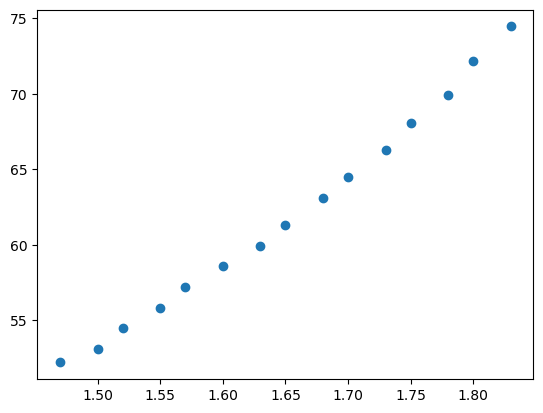

In [235]:
x = np.array(test.x, dtype=np.float64)
y = np.array(test.y, dtype=np.float64)

plt.scatter(x,y)
plt.show()

In [236]:
# 损失函数 J(w,b)
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i]) ** 2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [237]:
# 梯度下降法
def compute_gradient(x, y, w, b):
    # Number of training examples
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [243]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    w = copy.deepcopy(w_in)  # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graphing later
    w_history = []
    b_history = []
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w, b)
        
        w_history.append(w)
        b_history.append(b)

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        # Save cost J at each iteration
        if i < 100000:  # prevent resource exhaustion
            J_history.append(cost_function(x, y, w, b))
            p_history.append([w, b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, J_history, p_history, w_history, b_history  # return w and J,w history for graphing

In [248]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 100000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist, w_hist, b_hist = gradient_descent(x ,y, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 1.81e+03  dj_dw: -1.032e+02, dj_db: -6.208e+01   w:  1.032e+00, b: 6.20780e-01
Iteration 10000: Cost 3.85e+00  dj_dw: -7.923e-02, dj_db:  1.312e-01   w:  3.698e+01, b: 1.15950e+00
Iteration 20000: Cost 2.12e+00  dj_dw: -5.718e-02, dj_db:  9.469e-02   w:  4.375e+01, b:-1.00362e+01
Iteration 30000: Cost 1.23e+00  dj_dw: -4.126e-02, dj_db:  6.833e-02   w:  4.862e+01, b:-1.81156e+01
Iteration 40000: Cost 7.58e-01  dj_dw: -2.978e-02, dj_db:  4.931e-02   w:  5.214e+01, b:-2.39461e+01
Iteration 50000: Cost 5.15e-01  dj_dw: -2.149e-02, dj_db:  3.559e-02   w:  5.469e+01, b:-2.81536e+01
Iteration 60000: Cost 3.88e-01  dj_dw: -1.551e-02, dj_db:  2.568e-02   w:  5.652e+01, b:-3.11900e+01
Iteration 70000: Cost 3.22e-01  dj_dw: -1.119e-02, dj_db:  1.853e-02   w:  5.784e+01, b:-3.33812e+01
Iteration 80000: Cost 2.87e-01  dj_dw: -8.076e-03, dj_db:  1.337e-02   w:  5.880e+01, b:-3.49624e+01
Iteration 90000: Cost 2.69e-01  dj_dw: -5.828e-03, dj_db:  9.651e-03   w:  5.949e+01, b:-3.6

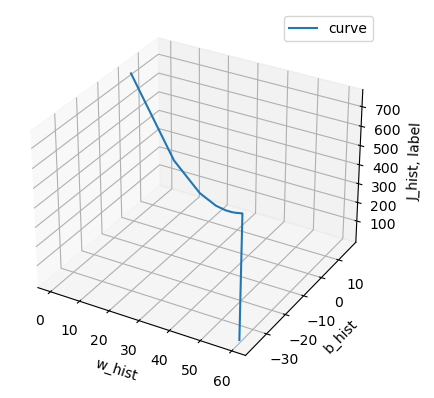

In [240]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(w_hist, b_hist, J_hist, label='curve')

# 添加标签和标题
ax.set_xlabel('w_hist')
ax.set_ylabel('b_hist')
ax.set_zlabel('J_hist, label')
ax.legend()
plt.show()

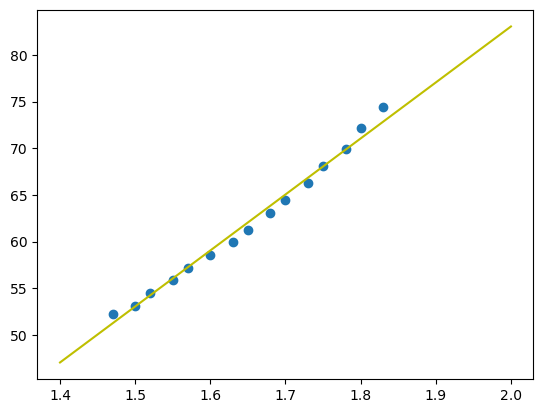

In [250]:
f_x = np.linspace(1.4, 2.0, 10)
f_y = w_final * f_x + b_final
plt.scatter(x,y)
plt.plot(f_x, f_y, color = 'y')
plt.show()